In [ ]:
import numpy as np
np.random.seed(42)
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import time

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN,LSTM,GRU,Dropout
from sklearn.preprocessing import MinMaxScaler   #change this part to diffrent Methods asked in 11

In [ ]:
import pandas as pd
import datetime
import pandas_datareader as pdr
from pandas import Series,DataFrame
start=datetime.datetime(2014,9,20)
end=datetime.datetime(2021,5,20)
df=pdr.get_data_yahoo(['BTC-USD'],start=start,end=end)
df.drop('Adj Close', inplace=True, axis=1)

In [ ]:
# df

# Specify inputs

In [ ]:
seq=27   #Set from 24_28
tt=0

# Data & Preprocessing

In [ ]:
# list1=['Close','High','Low','Open','Volume']   #Change it:List of desired X Features
list1=['Close','Open','Low']   #Change it:List of desired X Features
df1=df[list1]
data=df1.values

In [ ]:
hh=len(list1)-1   #feature dimension

In [ ]:
training_data=data[:2000,:]
data_test=data[2000:,:]

In [ ]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
# training_data

In [ ]:
X_train = [] 
Y_train = []
for i in range(seq, training_data.shape[0]):
   X_train.append(training_data[i-seq:i,1:])
   Y_train.append(training_data[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [ ]:
scaler = MinMaxScaler()
data_test = scaler.fit_transform(data_test)
# data_test
X_test = []
Y_test = []
for i in range (seq, data_test.shape[0]):
  X_test.append(data_test[i-seq:i,1:])
  Y_test.append(data_test[i, 0])
X_test, Y_test = np.array(X_test), np.array(Y_test)
# X_test.shape,Y_test.shape

In [ ]:
X_train.shape

(1973, 27, 2)

In [ ]:
#Change the following blocks,RNN,GRU,LSTM Also the activation Function

# Build The Model

In [ ]:
model = Sequential() 
model.add(GRU(units = seq ,return_sequences = True, activation = 'tanh', input_shape = (seq, hh),recurrent_dropout=0.2))
model.add(GRU(units = 60, activation = 'relu', return_sequences = True,recurrent_dropout=0.3))
model.add(GRU(units = 80, activation = 'relu',recurrent_dropout=0.5))
model.add(Dense(units =1))
model.compile(loss='MSE', optimizer='Adam')
model.summary()



# history= model.fit(X_train, Y_train, epochs = 20, batch_size =30, validation_split=0.2)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 27, 27)            2511      
_________________________________________________________________
gru_1 (GRU)                  (None, 27, 60)            16020     
_________________________________________________________________
gru_2 (GRU)                  (None, 80)                34080     
_________________________________________________________________
dense (Dense)                (None, 1)                 81        
Total params: 52,692
Trainable params: 52,692
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# model = Sequential() 
# model.add(GRU(units = seq ,return_sequences = True, activation = 'tanh', input_shape = (seq, hh)))    #return_sequences = True
# model.add(Dropout(0.2))
# model.add(GRU(units = 60, activation = 'relu', return_sequences = True))
# model.add(Dropout(0.3))
# model.add(GRU(units = 80, activation = 'relu', return_sequences = True))
# model.add(Dropout(0.4)) 
# model.add(GRU(units = 120, activation = 'relu'))
# model.add(Dropout(0.5)) 
# model.add(Dense(units =1))
# model.compile(loss='MSE', optimizer='Adam')
# model.summary()



# # history= model.fit(X_train, Y_train, epochs = 20, batch_size =30, validation_split=0.2)


# Fit the model on our data

In [ ]:
start=time.time()
history= model.fit(X_train, Y_train, epochs = 20, batch_size =30, validation_split=0.2)
print("The test results for loss is")
model.evaluate(X_test, Y_test, batch_size=10, verbose=1)
end=time.time()
tt=end-start
print('The fitting and evaluation time is:  ',tt,'Seconds')


Epoch 1/20
53/53 [==============================] - 38s 267ms/step - loss: 0.0186 - val_loss: 0.0020
Epoch 2/20
53/53 [==============================] - 12s 226ms/step - loss: 9.7121e-04 - val_loss: 0.0014
Epoch 3/20
53/53 [==============================] - 12s 225ms/step - loss: 9.7956e-04 - val_loss: 0.0010
Epoch 4/20
53/53 [==============================] - 12s 225ms/step - loss: 9.5917e-04 - val_loss: 9.9747e-04
Epoch 5/20
53/53 [==============================] - 12s 223ms/step - loss: 6.0636e-04 - val_loss: 0.0020
Epoch 6/20
53/53 [==============================] - 12s 224ms/step - loss: 6.3567e-04 - val_loss: 7.8917e-04
Epoch 7/20
53/53 [==============================] - 12s 225ms/step - loss: 7.9218e-04 - val_loss: 7.3189e-04
Epoch 8/20
53/53 [==============================] - 12s 226ms/step - loss: 5.5029e-04 - val_loss: 6.1817e-04
Epoch 9/20
53/53 [==============================] - 12s 225ms/step - loss: 5.7215e-04 - val_loss: 5.8701e-04
Epoch 10/20
53/53 [====================

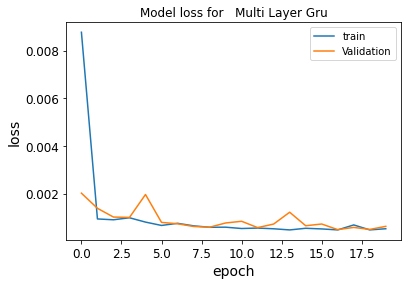

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss for   Multi Layer Gru')
plt.ylabel('loss')
plt.xlabel('epoch')
# plt.ylim([0,0.005])
plt.legend(['train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
Y_pred = model.predict(X_test)
scale = 1/scaler.scale_[0]
Y_test = Y_test*scale 
Y_pred = Y_pred*scale

In [ ]:
Y_pred.shape

(405, 1)

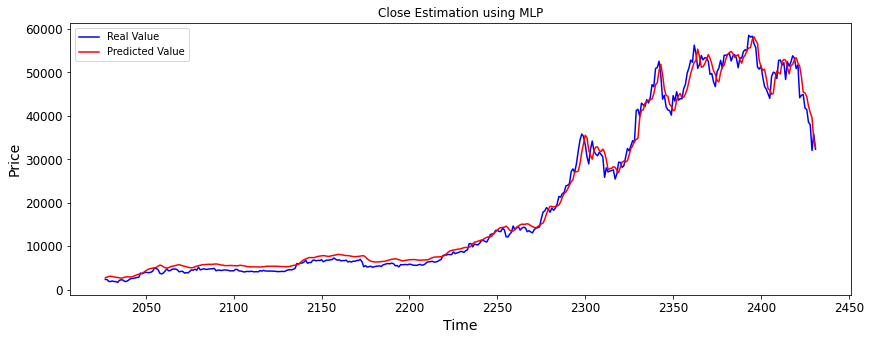

In [ ]:
plt.figure(figsize=(14,5))
plt.plot(range(2000+seq,2000+Y_test.shape[0]+seq),Y_test, color = 'blue', label = 'Real Value')
plt.plot(range(2000+seq,2000+Y_test.shape[0]+seq),Y_pred, color = 'red', label = 'Predicted Value')
plt.title('Close Estimation using MLP')
plt.xlabel('Time')
plt.ylabel('Price')
# plt.xlim([2350,2400])
# plt.ylim([40000,60000])
plt.legend()
plt.show()